В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)
2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. Mini-batch градієнтного спуску з `numpy` з умовою зупинки - різниця між старими і новими значеннями коефіцінєнтів.
4. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  
- виведіть графік помилки в залежності від ітерації

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [313]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
medical_df = pd.read_csv('data/medical-charges.csv') # замініть на ваш шлях до файлу
medical_df.head()
non_smoker_df = medical_df[medical_df.smoker == 'no']

### 1.1 Least Square Method

In [292]:
X = pd.DataFrame(non_smoker_df['age'])
Y = pd.DataFrame(non_smoker_df['charges'])
X_with_intersept = np.c_[np.ones((X.shape[0],1)), X]
X.shape

(1064, 1)

In [26]:
np.linalg.det(X.T.dot(X)) #детермінант <> 0

1861320.000000001

In [22]:
def calculateLSM(X, Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [211]:
wrongQ = calculateLSM(X, Y)
wrongQ #отримали 1 число замість 2х
Q_LSM = calculateLSM(X_with_intersept, Y)
print(Q_LSM)
Y_pred_LSM = Q_LSM[0] + Q_LSM[1] * X
RMSE_LSM = mean_squared_error(Y['charges'], Y_pred_LSM, squared=False)
print("RMSE для Least Square Method {}".format(RMSE_LSM))

[[-2091.42055657]
 [  267.24891283]]
RMSE 4662.505766636395


### 1.2 Full batch gradient descent

In [254]:
def fullBatchGradientDescent(X, Y, alpha, steps):
    a = 0
    b = 0
    m = X.shape[0]
    errorsArr = []
    for _ in range(steps):
        Y_pred = a * X + b
        errors = Y_pred - Y
        errorsArr.append(sum(errors**2))
        a_gr = (1/m) * np.dot(errors, X)
        b_gr = (1/m) * np.sum(errors)
        a -= alpha*a_gr
        b -= alpha*b_gr
    return (b, a, errorsArr)


Коефіцієнти для градієнтного спуску 3.8696617596406733 та 182.4119426901148 на кількості кроків 100 з альфа 0.001


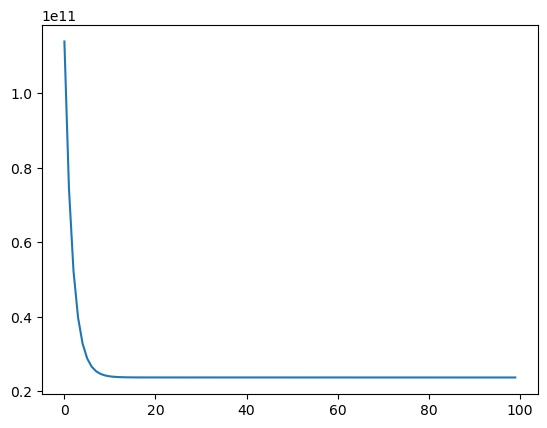

Коефіцієнти для градієнтного спуску 3.8696617596406733 та 182.4119426901148 на кількості кроків 100 з альфа 5e-05


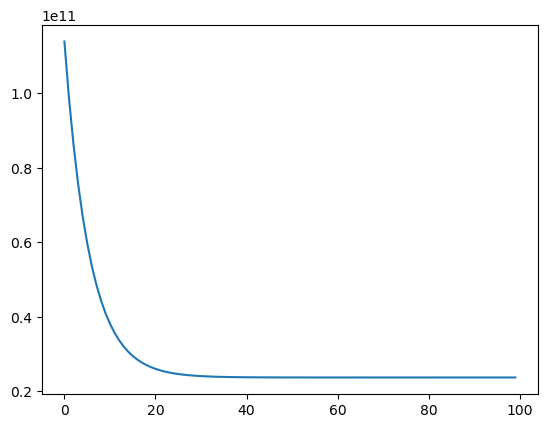

Коефіцієнти для градієнтного спуску 3.8696617596406733 та 182.4119426901148 на кількості кроків 100 з альфа 1e-05


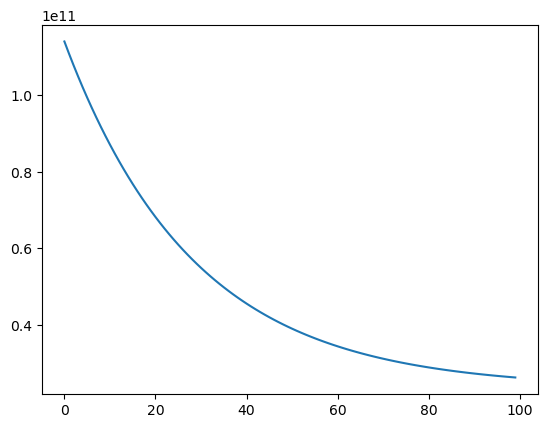

In [270]:
stepsCnt = 100
alpha = 0.001
Q11, Q01, errors1 = fullBatchGradientDescent(X['age'], Y['charges'], alpha, stepsCnt)
print("Коефіцієнти для градієнтного спуску {} та {} на кількості кроків {} з альфа {}".format(Q1, Q0, stepsCnt, alpha))
plt.plot(errors1)
plt.show()

stepsCnt = 100
alpha = 0.00005
Q12, Q02, errors2 = fullBatchGradientDescent(X['age'], Y['charges'], alpha, stepsCnt)
print("Коефіцієнти для градієнтного спуску {} та {} на кількості кроків {} з альфа {}".format(Q1, Q0, stepsCnt, alpha))
plt.plot(errors2)
plt.show()

stepsCnt = 100
alpha = 0.00001
Q11, Q02, errors3 = fullBatchGradientDescent(X['age'], Y['charges'], alpha, stepsCnt)
print("Коефіцієнти для градієнтного спуску {} та {} на кількості кроків {} з альфа {}".format(Q1, Q0, stepsCnt, alpha))
plt.plot(errors3)
plt.show()


In [271]:
Q1 = Q11
Q0 = Q01
Y_pred_GDF = Q1 + Q0 * X
RMSE_GDF= mean_squared_error(Y['charges'], Y_pred_GDF, squared=False)
print("RMSE для Full Gradient Descent {}".format(RMSE_GDF))

RMSE для Full Gradient Descent 4715.580740650768


### 1.3 Mini batch gradient descent

In [187]:
def miniBatchGradientDescent(X, Y, alpha, steps, diff):
    a = 0
    b = 0
    m = X.shape[0]
    for step in range(steps):
        Y_pred = a * X + b
        errors = Y_pred - Y
        a_gr = (1/m) * np.dot(errors, X)
        b_gr = (1/m) * np.sum(errors)
        a -= alpha*a_gr
        b -= alpha*b_gr
        if (np.abs(a_gr) < diff and np.abs(b_gr) < diff):
            break
    return a, b, step

In [236]:
Q1, Q0, step = miniBatchGradientDescent(X['age'], Y['charges'], 0.0005, 1000, 230)
print("Коефіцієнти для міні градієнтного спуску {} та {}".format(Q1, Q0))
Y_pred_MGD = Q1 + Q0 * X
RMSE_MGD= mean_squared_error(Y['charges'], Y_pred_MGD, squared=False)
print("RMSE для Mini Gradient Descent {}".format(RMSE_MGD))

Коефіцієнти для міні градієнтного спуску 221.51290211667666 та -60.11616052778744
RMSE для Mini Gradient Descent 12446.72088667805


In [173]:
!pip install scikit-learn --quiet

83943.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


### 1.4 LinearRegression

In [295]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
print("Коефіцієнти з використанням LinearRegression {} та {}".format(lin_reg.intercept_, lin_reg.coef_))
Y_pred_LR = lin_reg.intercept_ + lin_reg.coef_ * X
Y_pred_LR2 = lin_reg.predict(X)


Коефіцієнти з використанням LinearRegression [-2091.42055657] та [[267.24891283]]
               age
1      2719.059874
2      5391.549003
3      6727.793567
4      6460.544654
5      6193.295741
...            ...
1332  11805.522911
1333  11271.025085
1334   2719.059874
1335   2719.059874
1336   3520.806613

[1064 rows x 1 columns]
[[2719.0598744 ]
 [5391.54900271]
 [6727.79356686]
 ...
 [2719.0598744 ]
 [2719.0598744 ]
 [3520.80661289]]


In [217]:
RMSE_LR= mean_squared_error(Y['charges'], Y_pred_LR, squared=False)
print("RMSE для Linear Regression {}".format(RMSE_LR))

RMSE для Linear Regression 4662.505766636395


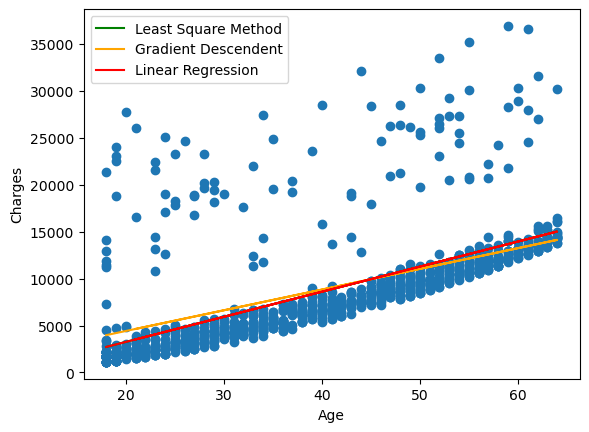

In [272]:
plt.scatter(X['age'], Y['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.plot(X['age'],Y_pred_LSM, color='green', label='Least Square Method')
plt.plot(X['age'],Y_pred_GDF, color='orange', label='Gradient Descendent')
plt.plot(X['age'],Y_pred_LR, color='red', label='Linear Regression')
plt.legend()
plt.show()

Linear Regression звісно гарно ілюструє тенденцію, але чомусь інтуітивно лінію на графіку хочеться опустити трішки нижче

 **Завдання 2.** Повторіть кроки цього розділу, щоб навчити модель лінійної регресії оцінювати розмір медичних збори для курців за їх віком. Цього разу давайте побудуємо модель лише з допомогою sklearn. Обчисліть точність моделі, виведіть коефіцієнти, візуалізуйте модель і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [273]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [305]:
X_s = smoker_df['age']
Y_s = smoker_df['charges']
X_df = X_s.to_numpy().reshape(-1, 1);
Y_df = Y_s.to_numpy().reshape(-1, 1);
LR = LinearRegression()
LR.fit(X_df, Y_df)
a = LR.coef_
b = LR.intercept_
Y_pred = a * X_df + b
Y_pred2 = LR.predict(X_df)

In [312]:
RMSE2 = mean_squared_error(Y_df, Y_pred, squared = False)
print("RMSE = {}".format(RMSE2))

RMSE = 10711.00334810241


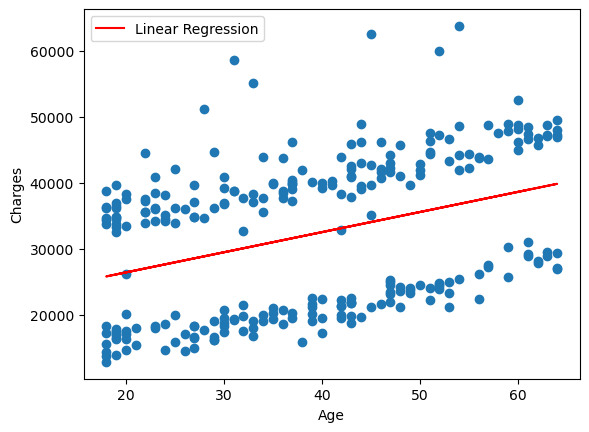

In [315]:
plt.scatter(X_s, Y_s)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.plot(X_df, Y_pred, color='red', label='Linear Regression')
plt.legend()
plt.show()

RMSE велике, графік не наглядно зображає, модель насправді не прогнозує значення і не може бути використана